<h1 style="color:#FF00A6; font-weight:bold; font-family:sans-serif;">
  Snappfood Data Analyst Task
</h1>

<h3 style="color:#F9FAFB; font-family:sans-serif;">
  Task 1 – <em>Restaurant Assignment</em>
</h3>

<p style="color:#EBEDF0; font-size:14px; font-family:sans-serif;">
  Assign restaurants to 5 data collectors to minimize total travel distance based on their coordinates.
</p>
<br>
<hr style="color:#FF00A6;">

# Imports & Setup

In [ ]:
# Import the importlib module to check if the required libraries are installed
import importlib.util

# List of required libraries
required_libraries = ['requests', 'pandas', 'matplotlib', 'scikit-learn']

# Install the required libraries if they are not already installed
for lib in required_libraries:
    if importlib.util.find_spec(lib) is None:
        %pip install {lib}

import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


Note: you may need to restart the kernel to use updated packages.


# Prepare Dataset

## Download from Google Sheets

In [9]:
def download_sheet_as_csv(spreadsheet_id, gid, output_path):
    url = f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export"
    params = {
        "format": "csv",
        "gid": gid
    }
    response = requests.get(url, params=params)

    if response.status_code == 200:
        with open(output_path, "wb") as f:
            f.write(response.content)
        print(f"Sheet downloaded and saved to '{output_path}'")
    else:
        print(f"Failed to download sheet. Status code: {response.status_code}")

# Replace with your actual spreadsheet ID and sheet GID
SPREADSHEET_ID = "1ic4RLD_r4ASfl7nRk2ctagH_98j2sPDYN7IB4n6n9e8"
GID = "0"  # GID of Task 1 sheet
OUTPUT_FILE = "./task1_dataset.csv"

download_sheet_as_csv(SPREADSHEET_ID, GID, OUTPUT_FILE)


Sheet downloaded and saved to './task1_dataset.csv'


## Load Dataset

In [12]:
df = pd.read_csv("./task1_dataset.csv")

# Preview
df.head()


,Feature_1,Feature_2
0,1.843183,1.314703
1,1.781859,0.925744
2,0.806028,-2.324464
3,-0.180512,0.555683
4,0.741876,-2.115367


# Clustering

## Raw Coordinates

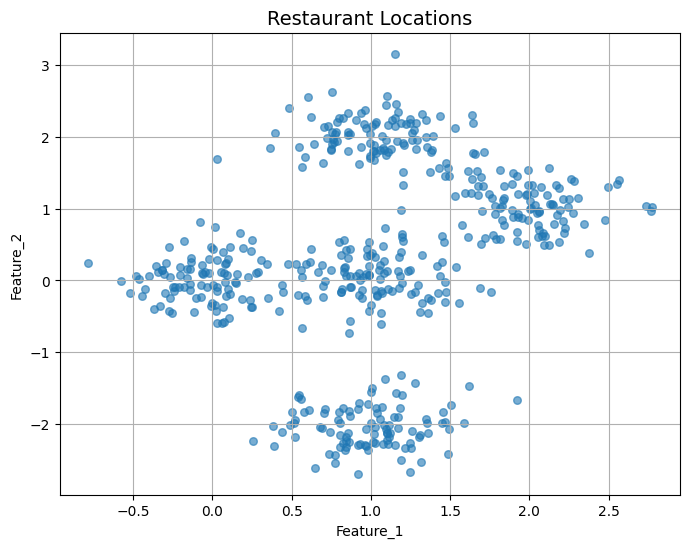

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature_1'], df['Feature_2'], alpha=0.6, s=30)
plt.title("Restaurant Locations", fontsize=14)
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.grid(True)
plt.show()


## KMeans Clustering

In [66]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_label'] = kmeans.fit_predict(df[['Feature_1', 'Feature_2']])
kmeans_centroids = kmeans.cluster_centers_


### Visualize Clusters

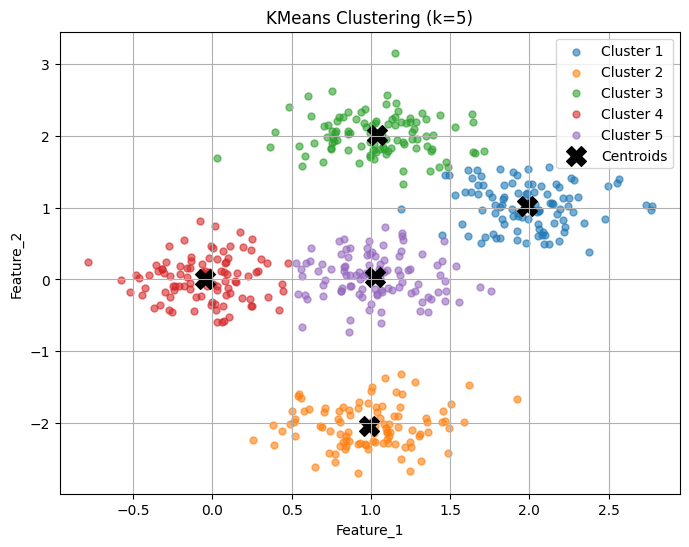

KMeans Cluster Size Breakdown:
kmeans_label
4    102
2    101
1    100
0     99
3     98
Name: count, dtype: int64


In [74]:
plt.figure(figsize=(8, 6))
for i in range(5):
    cluster = df[df['kmeans_label'] == i]
    plt.scatter(cluster['Feature_1'], cluster['Feature_2'], s=25, label=f'Cluster {i+1}', alpha=0.6)

plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.title("KMeans Clustering (k=5)")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.legend()
plt.grid(True)
plt.show()

print("KMeans Cluster Size Breakdown:")
kmeans_counts = df['kmeans_label'].value_counts().sort_values(ascending=False)
print(kmeans_counts)


## Agglomerative Clustering

In [68]:
agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['agglo_label'] = agglo.fit_predict(df[['Feature_1', 'Feature_2']])


### Visualize Clusters

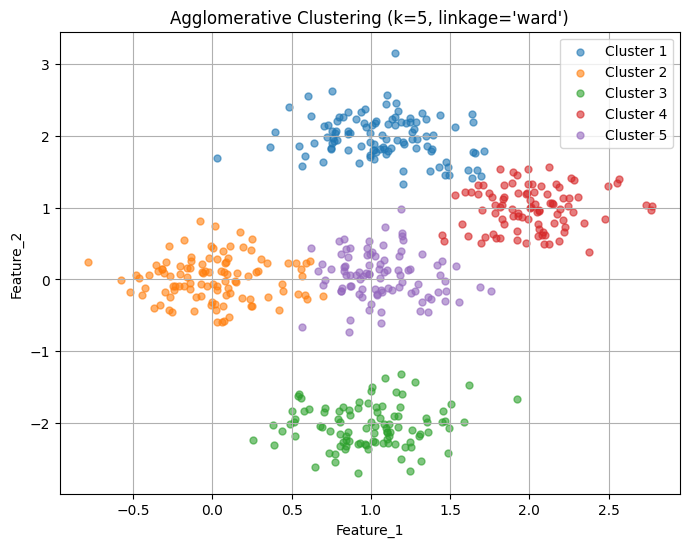

Agglomerative Cluster Size Breakdown:
agglo_label
1    107
0    107
2    100
3     93
4     93
Name: count, dtype: int64


In [75]:
plt.figure(figsize=(8, 6))
for i in range(5):
    cluster = df[df['agglo_label'] == i]
    plt.scatter(cluster['Feature_1'], cluster['Feature_2'], s=25, label=f'Cluster {i+1}', alpha=0.6)

plt.title("Agglomerative Clustering (k=5, linkage='ward')")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.legend()
plt.grid(True)
plt.show()

print("Agglomerative Cluster Size Breakdown:")
agglo_counts = df['agglo_label'].value_counts().sort_values(ascending=False)
print(agglo_counts)
